In [1]:
# library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"D:\Personal Project\DA_DE\Humidity_temp_prediction\Humidity_Temp_Prediction.csv", delimiter = ';', parse_dates = ['date_time'])
data

,id,temp,humidity,date_time
0,9197,21,20,2016-08-17 00:00:01
1,9198,21,20,2016-08-17 00:01:01
2,9199,21,20,2016-08-17 00:02:01
3,9200,21,20,2016-08-17 00:03:01
4,9201,21,20,2016-08-17 00:04:01
...,...,...,...,...
619994,629191,18,21,2017-12-17 03:13:01
619995,629192,18,21,2017-12-17 03:14:02
619996,629193,18,21,2017-12-17 03:15:02
619997,629194,19,20,2017-12-17 03:16:01


In [3]:
data['minute'] = data['date_time'].dt.minute
data['hour'] = data['date_time'].dt.hour
data['day'] = data['date_time'].dt.day
data['month'] = data['date_time'].dt.month
data['minute'] = data['minute'] + data['hour']*60

In [4]:
NumericStatsDF = data.describe(include = [np.number])
CategoryStatsDF = data.describe(exclude = [np.number])

In [5]:
NumericStatsDF

,id,temp,humidity,minute,hour,day,month
count,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000
mean,319196.000000,19.365405,41.340391,715.723067,11.436893,15.616833,7.460789
std,178978.439111,1.523185,32.418998,417.192832,6.946960,8.817493,3.360717
min,9197.000000,15.000000,16.000000,0.000000,0.000000,1.000000,1.000000
25%,164196.500000,18.000000,20.000000,354.000000,5.000000,8.000000,5.000000
50%,319196.000000,19.000000,21.000000,711.000000,11.000000,16.000000,8.000000
75%,474195.500000,20.000000,95.000000,1079.000000,17.000000,23.000000,10.000000
max,629195.000000,28.000000,95.000000,1439.000000,23.000000,31.000000,12.000000


In [6]:
CategoryStatsDF

,date_time
count,619999
unique,619985
top,2017-11-04 17:43:33
freq,3
first,2016-08-17 00:00:01
last,2017-12-17 03:17:02


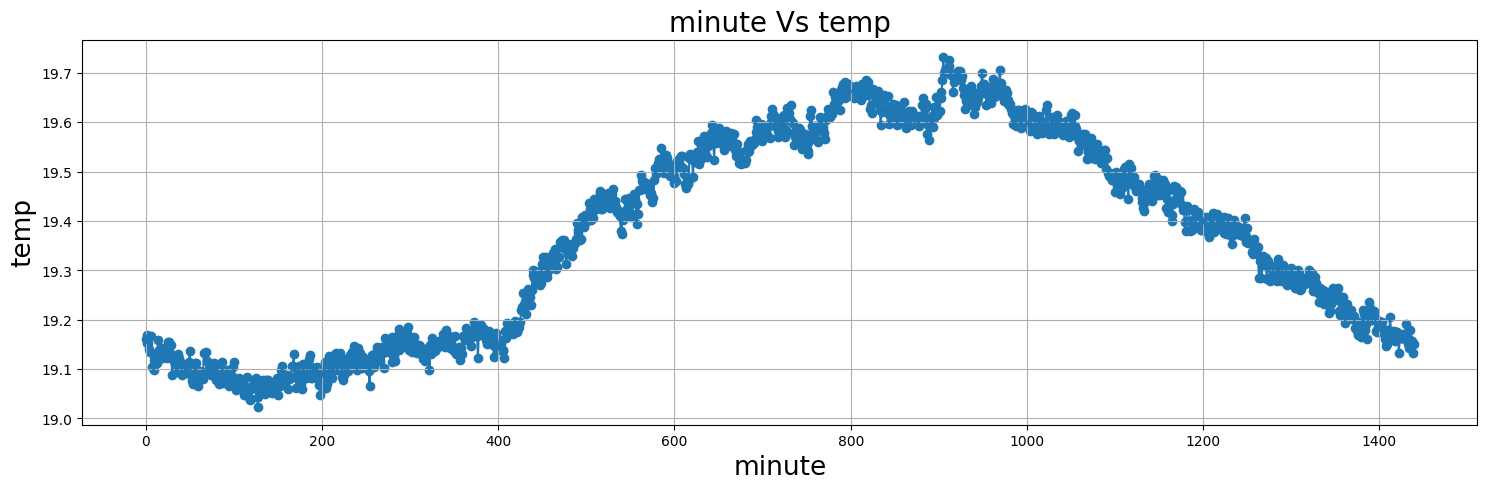

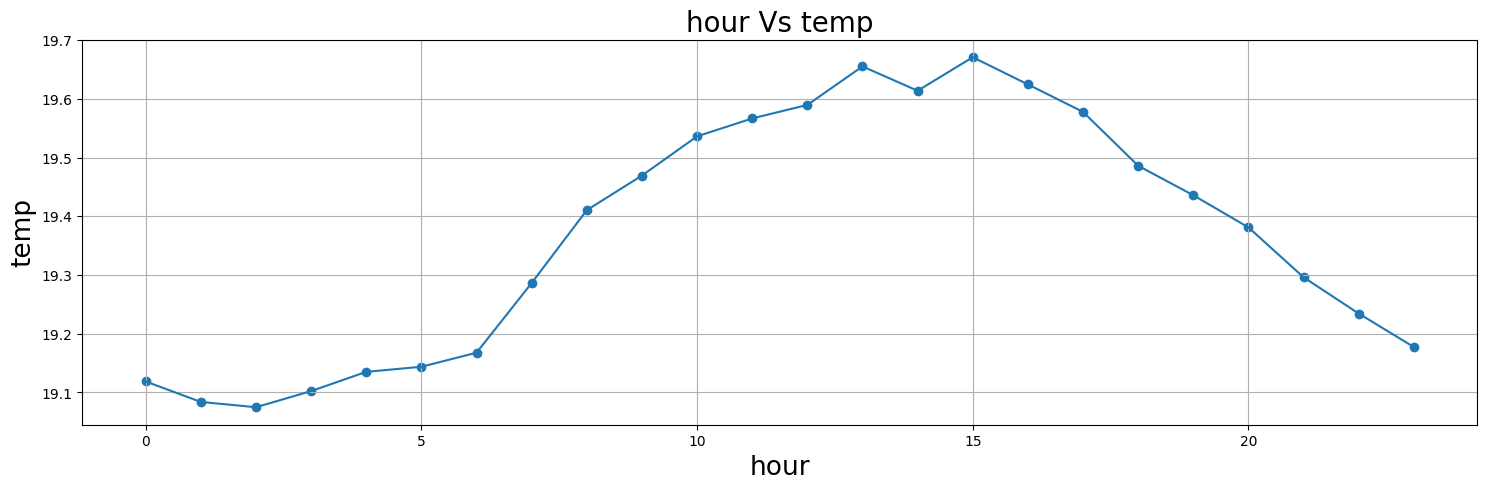

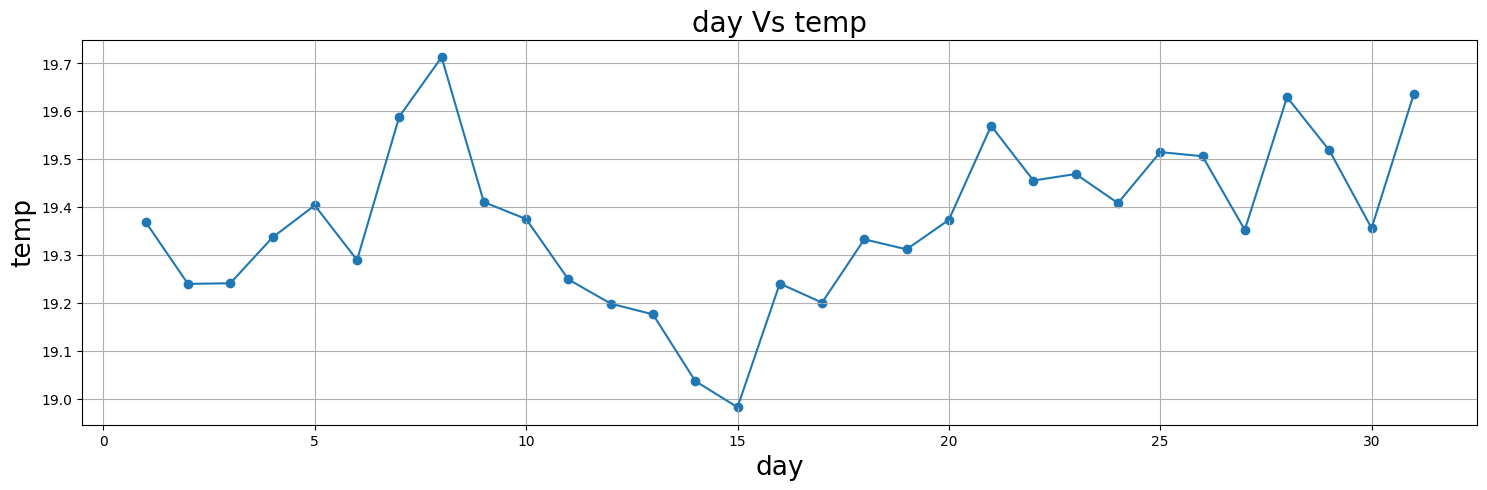

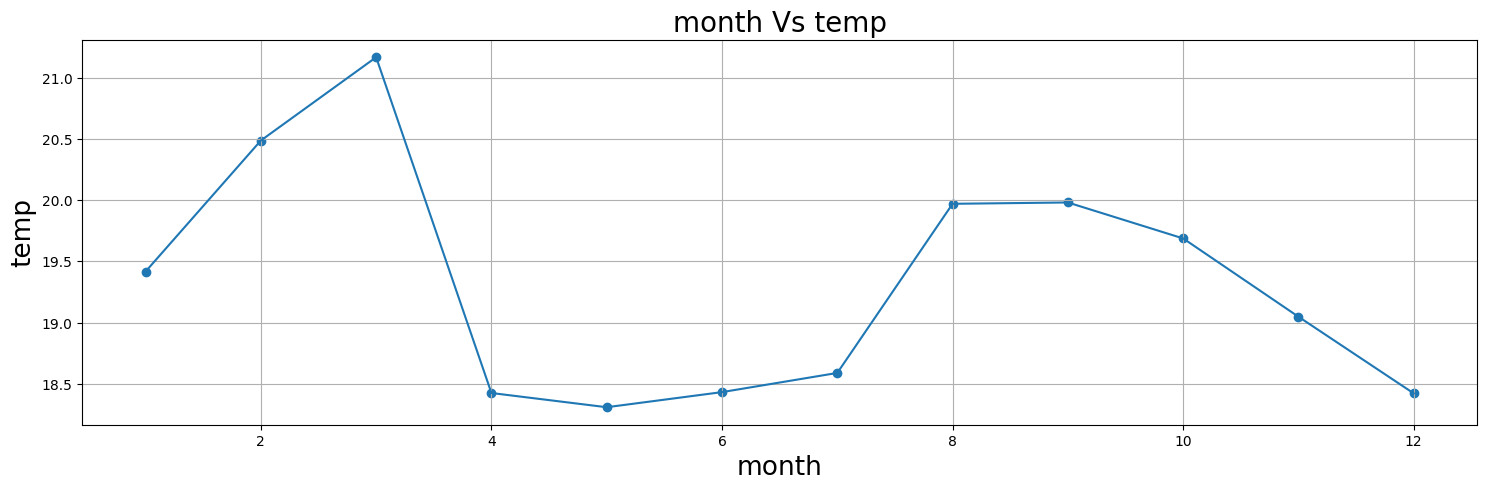

In [7]:
def SensorViz(df, feature_X, feature_y):
    plt.figure(figsize = (18, 5))
    plt.scatter(df[feature_X], df[feature_y])
    plt.plot(df[feature_X], df[feature_y])
    plt.title(f'{feature_X} Vs {feature_y}', size = 20)
    plt.xlabel(feature_X, size = 19)
    plt.ylabel(feature_y, size = 19)
    plt.grid()
    
feature_y = 'temp'

feature_X = 'minute'
data_group = data[[feature_X, feature_y]].groupby(feature_X, as_index = False).mean()
SensorViz(data_group, feature_X, feature_y)

feature_X = 'hour'
data_group = data[[feature_X, feature_y]].groupby(feature_X, as_index = False).mean()
SensorViz(data_group, feature_X, feature_y)

feature_X = "day"
data_group = data[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()
SensorViz(data_group, feature_X, feature_y)

feature_X = "month"
data_group = data[[feature_X, feature_y]].groupby(feature_X,as_index=False).mean()
SensorViz(data_group, feature_X, feature_y)

In [8]:
feature_X = 'minute'
feature_y = 'temp'
data_group = data[[feature_X, feature_y]].groupby(feature_X, as_index = False).mean()

X = data_group[[feature_X]].values
y = data_group[[feature_y]].values

print(type(X))
print(X)
print(type(y))
print(y)

<class 'numpy.ndarray'>
[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
<class 'numpy.ndarray'>
[[19.16173121]
 [19.15331808]
 [19.16968326]
 ...
 [19.15789474]
 [19.13211845]
 [19.15068493]]


In [9]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
print(X_poly[:5])

[[  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print('Incorrect input:', X_poly[0])
print('Correct Input:', X_poly[0].reshape(1, -1))
print('Output: ', lin_reg.predict(X_poly[0].reshape(1, -1)))

Incorrect input: [1. 0. 0. 0. 0.]
Correct Input: [[1. 0. 0. 0. 0.]]
Output:  [[19.19123175]]


In [11]:
y_predict = lin_reg.predict(poly_reg.fit_transform(X))
print(f"true {feature_y} value: \n {y}")
print(f"\npredicted {feature_y} value: \n {y_predict}")

true temp value: 
 [[19.16173121]
 [19.15331808]
 [19.16968326]
 ...
 [19.15789474]
 [19.13211845]
 [19.15068493]]

predicted temp value: 
 [[19.19123175]
 [19.18928943]
 [19.1873632 ]
 ...
 [19.14239875]
 [19.14153535]
 [19.14067664]]


In [12]:
def SensorVizWithPrediction(df, feature_X, feature_y, y_predict, savefig = False):
    plt.figure(figsize=(18,5))
    plt.scatter(df[feature_X],df[feature_y])
    plt.plot(df[feature_X],df[feature_y])
    plt.plot(df[feature_X], y_predict, color = 'red', linewidth=5)
    plt.title(f'{feature_X} Vs {feature_y}', size = 20)
    plt.xlabel(feature_X, size = 20)
    plt.ylabel(feature_y, size = 20)
    plt.grid()

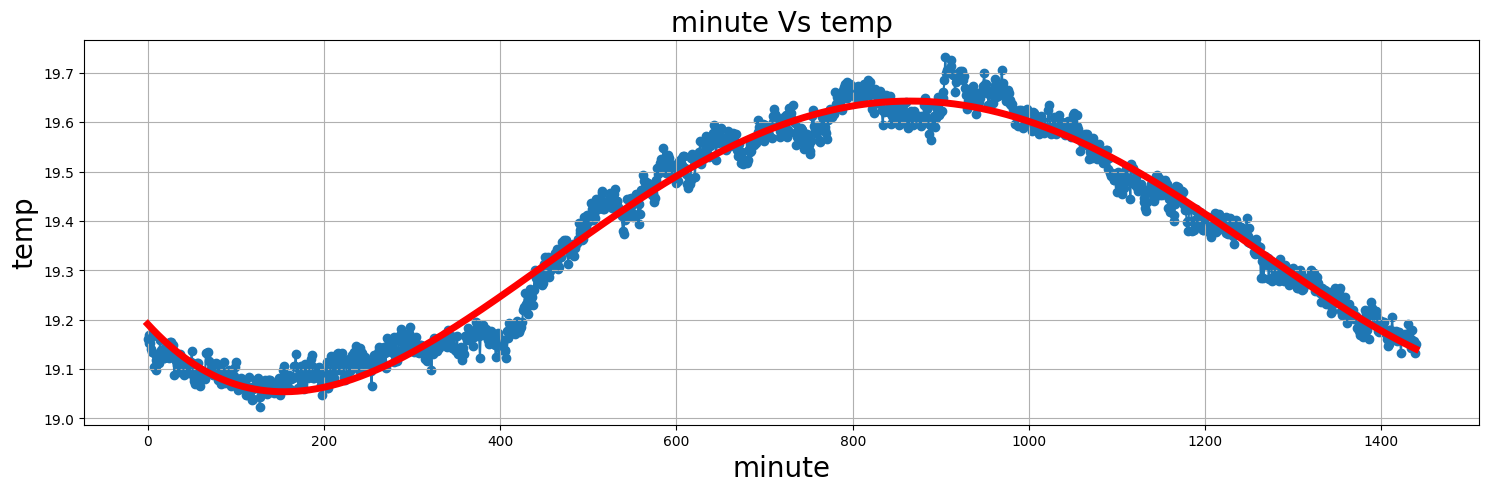

In [13]:
SensorVizWithPrediction(data_group, feature_X, feature_y, y_predict, savefig = False)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Rsquare2 = r2_score(y, y_predict)
MSE = mean_squared_error(y, y_predict)
RMSE = mean_squared_error(y, y_predict, squared = False) # If True returns MSE value, if False returns RMSE value.
MAE = mean_absolute_error(y, y_predict)

print(f"Rsquare2 : {Rsquare2}")
print(f"Mean Square Error : {MSE}")
print(f"Root Mean Square Error : {RMSE}")
print(f"Mean Absolute Error : {MAE}")

Rsquare2 : 0.9757174492156215
Mean Square Error : 0.0010326295369986378
Root Mean Square Error : 0.03213455362998898
Mean Absolute Error : 0.025148564018684923


<Figure size 2000x500 with 0 Axes>

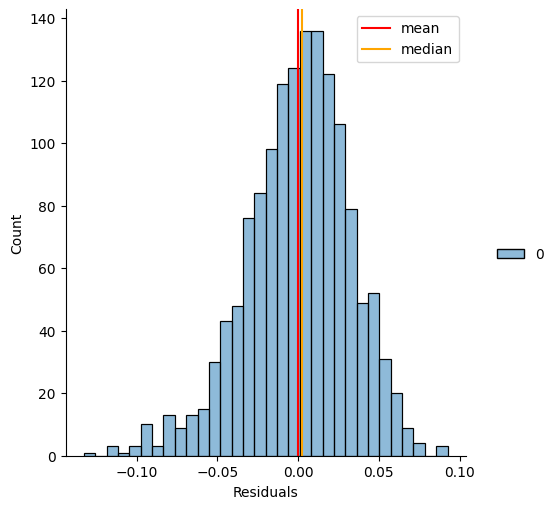

In [15]:
# Model Assessment
residuals = y - y_predict
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.savefig(f"{feature_X} Vs {feature_y} Residuals Analysis.jpg")
plt.show()

In [16]:
std = np.std(residuals)
y_predict_upBound = y_predict + 3*std
y_predict_lowBound = y_predict - 3*std

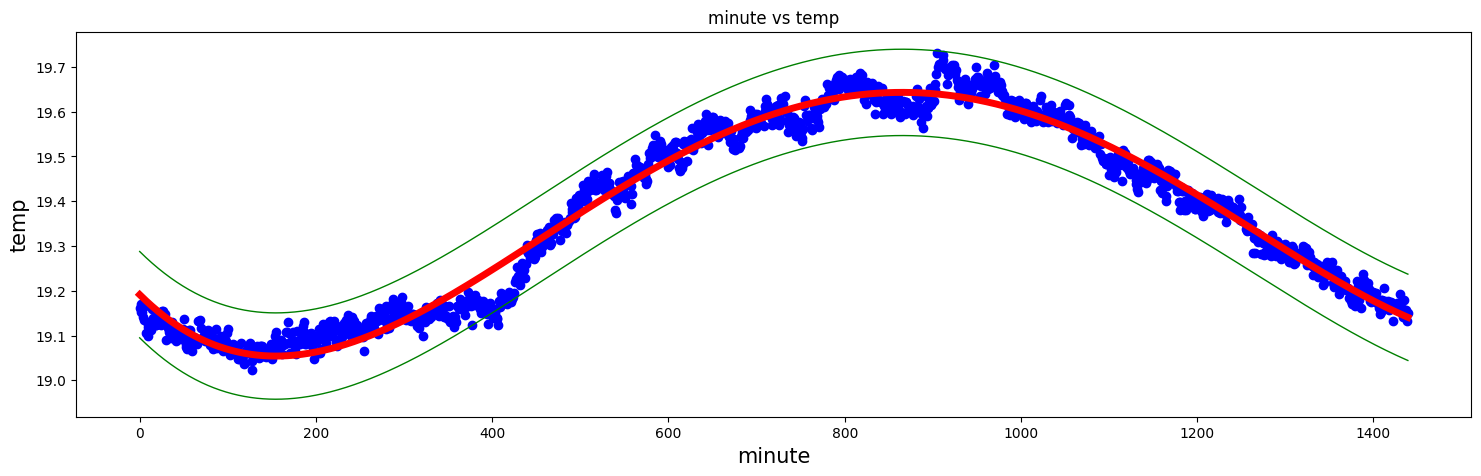

In [17]:
plt.figure(figsize=(18, 5))
plt.scatter(X,y, color = "blue")
plt.plot(X, y_predict, color = "red", linewidth = 5)
plt.plot(X, y_predict_upBound, color = "green", linewidth = 1)
plt.plot(X, y_predict_lowBound, color = "green", linewidth = 1)
plt.title(f"{feature_X} vs {feature_y}")
plt.xlabel(feature_X, size = 15)
plt.ylabel(feature_y, size = 15)
plt.show()

In [18]:
LogDF = pd.DataFrame(columns = ["minute", "true_temp", "predicted_temp", "conf_lower", "conf_upper"])
LogDF["minute"] = X.reshape(-1)
LogDF["true_temp"] = y
LogDF["predicted_temp"] = y_predict
LogDF["conf_lower"] = y_predict_lowBound
LogDF["conf_upper"] = y_predict_upBound
LogDF["Alarm"] = (LogDF["true_temp"] < LogDF["conf_lower"]) | (LogDF["true_temp"] > LogDF["conf_upper"])
display(LogDF.head())
print("Alarm Time : ")
print(LogDF[LogDF["Alarm"] == True])

,minute,true_temp,predicted_temp,conf_lower,conf_upper,Alarm
0,0,19.161731,19.191232,19.094828,19.287635,False
1,1,19.153318,19.189289,19.092886,19.285693,False
2,2,19.169683,19.187363,19.090960,19.283767,False
3,3,19.152273,19.185453,19.089049,19.281857,False
4,4,19.141230,19.183559,19.087155,19.279962,False


Alarm Time : 
     minute  true_temp  predicted_temp  conf_lower  conf_upper  Alarm
395     395  19.125000       19.240727   19.144323   19.337130   True
400     400  19.145786       19.246916   19.150512   19.343319   True
401     401  19.138952       19.248158   19.151754   19.344561   True
403     403  19.150342       19.250645   19.154242   19.347049   True
405     405  19.138952       19.253138   19.156734   19.349542   True
406     406  19.136674       19.254386   19.157982   19.350790   True
407     407  19.123007       19.255635   19.159232   19.352039   True
417     417  19.171233       19.268186   19.171783   19.364590   True
421     421  19.175399       19.273233   19.176829   19.369637   True
